In [508]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# predata = pd.read_excel('people-20210222.xlsx', sheet_name='新label')
predata = pd.read_excel('iR-20210224.xlsx', sheet_name='数字数据')
# print(predata.shape)
# predata.info()


dat=predata
print(dat.isnull().any().any())
# print(dat.isnull().sum())

False


In [509]:
dat.head()

,NO,S2,S3t1,S4,S7,S8,F1,B3,B4,frequencyMI,...,B1s11,B1s12,B1s13,B1s14,B1s15,B1s16,B1s17,B1s18,B1s19,B1s20
0,1000006,2,48,2,8,5,2,5,5,2,...,4,4,4,3,3,5,5,5,3,4
1,1000009,2,40,4,8,1,2,4,1,1,...,4,4,4,4,5,4,4,4,4,4
2,1000017,2,53,3,8,1,1,2,5,1,...,3,3,4,3,3,3,3,3,3,3
3,1000036,2,41,4,3,2,2,3,2,1,...,3,4,3,3,4,3,3,4,3,3
4,1000126,1,39,6,4,2,2,4,4,2,...,4,4,4,4,4,4,4,4,4,4


In [446]:
# import warnings
# import seaborn as sns
# import matplotlib.pyplot as plt
# warnings.filterwarnings('ignore')
# plt.rcParams['figure.figsize'] = (25, 10)
# sns.heatmap(dat[['frequencyMI','frequencyTTL','totalValueMI','totalValueTTL','配件消费']].corr(), cmap='GnBu_r', square=True, annot=True)

In [510]:
# xdata = dat[['S2','S3t1','S4','B3','B4','B5','S6','S7','S8','S11','F1',             
#       'H2','H4','H5','E4','B1s1','B1s2','B1s3','B1s4','B1s5',
#       'B1s6','B1s7','B1s8','B1s9','B1s10','B1s11','B1s12','B1s13','B1s14','B1s15',
#       'B1s16','B1s17','B1s18','B1s19','B1s20', 'frequencyMI','totalValueMI','配件消费',]]  #'frequencyMI','frequencyTTL','totalValueMI',
# print(xdata.shape)

# xdata1 = dat[['S2','S3t1','S4','B3','B4','B5','S6','S8','F1',             
#       'H2','H4','H5','B1s1','B1s2','B1s3','B1s4','B1s5',
#       'B1s6','B1s7','B1s8','B1s9','B1s10','B1s11','B1s12','B1s13','B1s14','B1s15',
#       'B1s16','B1s17','B1s18','B1s19','B1s20', 'label']]  #'frequencyMI','frequencyTTL','totalValueMI',
# print(xdata1.shape)

xdata2 =  dat[['S2','S3t1','S4','S7','S8','F1','B3','B4','frequencyMI','totalValueMI','配件消费']]
print(xdata2.shape)

# xdata3 =  dat[['S2','S3t1','S4','B3','B4','B5','S6','S8','F1',             
#       'H2','H4','H5','label']]
# print(xdata3.shape)


(2097, 11)


In [485]:
X = xdata2.drop(['label'],axis=1)
Y = xdata1['label']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.1)
print(X.shape)
print(Y.shape)
print(Xtrain.shape)
print(Xtest.shape)

(2097, 12)
(2097,)
(1887, 12)
(210, 12)


In [486]:
clf = DecisionTreeClassifier(random_state=555, class_weight='balanced') # 初始化
clf = clf.fit(Xtrain,Ytrain) # 拟合

# 分类准确率
score_ = clf.score(Xtest, Ytest) # 验证集查看得分
print(score_)

# 可以输入数据送到训练好的模型里，输出预测的类
y_pred = clf.predict(Xtest)
print(y_pred[:100])

#看特征变量的使用情况
# [*zip(feature_name,clf.feature_importances_)]

0.4095238095238095
[5 2 2 5 7 7 7 2 7 7 7 7 7 7 7 6 5 1 7 4 7 7 7 7 0 7 1 1 7 7 3 7 7 5 7 5 7
 7 1 1 5 3 5 6 5 5 7 1 5 5 7 0 7 3 7 6 0 7 7 7 6 4 1 5 7 7 5 7 0 6 5 5 7 1
 7 5 5 7 0 5 1 5 7 5 7 7 0 7 5 0 7 7 3 5 6 1 7 4 7 4]


In [487]:
#生成决策树
from sklearn.tree import DecisionTreeClassifier
#设置最大叶子数为8
dtModel = DecisionTreeClassifier(random_state=777, class_weight='balanced',max_leaf_nodes=13) 

#模型检验－交叉验证法
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtModel,X,Y,cv=10).mean())

#训练模型
dtModel=dtModel.fit(X,Y) 

0.3314809751651857


In [488]:
# tree模型可视化
import re
import pydotplus
from six import StringIO  #生成StringIO对象
from sklearn.tree import export_graphviz
# dot_data = StringIO() #把文件暂时写在内存的对象中
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

dot_data = export_graphviz(
    dtModel,
    out_file=None,
    class_names=['0','1','2','3','4','5','6','7'],
#     feature_names=['性别', '年龄', '家庭年收入', '教育水平', '种族', '宗教信仰', '上次为谁购买', '使用乐器频率', 
#        '是否可以演奏多种乐器', '上次在哪里购买', '购物思考时间', '购物方式',  '质量','定制化','新潮','简约','传统','归属感','刺激','自然',
#         '服务','自由自在','激情','高尚','科技','活力','进取','明智购物','个人效率','古典','安逸','全面成本'],
    
    feature_names=['性别', '年龄', '家庭年收入',  '教育水平', '种族', '宗教信仰', '上次为谁购买',  '使用乐器频率', 
       '是否可以演奏多种乐器', '上次在哪里购买', '购物思考时间', '购物方式'],
#     feature_names=['S2','S3t1','S4','B2','B3','B4','B5','S6','S7','S8','S11','F1',
#       'H2','H4','H5','E1','E4','E6','U1','U3','B1s1','B1s2','B1s3','B1s4','B1s5',
#       'B1s6','B1s7','B1s8','B1s9','B1s10','B1s11','B1s12','B1s13','B1s14','B1s15',
#       'B1s16','B1s17','B1s18','B1s19','B1s20','totalValueTTL'],
    filled=True,rounded=True,special_characters=True
)

with open("dot_data.dot", 'w+', encoding="utf-8-sig") as f:  # 注意编码方式
    f.writelines(dot_data)
    
# 打开 dot_data.dot，修改 fontname="支持的中文字体"
f = open("dot_data.dot",  encoding="utf-8-sig")
open('dot_test.dot', 'w+', encoding="utf-8-sig").write(re.sub(r'fontname=helvetica', 'fontname="Microsoft YaHei"', f.read()))

with open("dot_test.dot",  encoding="utf-8-sig") as fp:
    dot_test = fp.read()
    
graph = pydotplus.graph_from_dot_data(dot_test)  #.getvalue()
graph.write_pdf('去除S7S11E4B2+去除价值观的决策树23.pdf')

True

Number of nodes in the last tree is: 3 with ccp_alpha: 0.02519196799259671


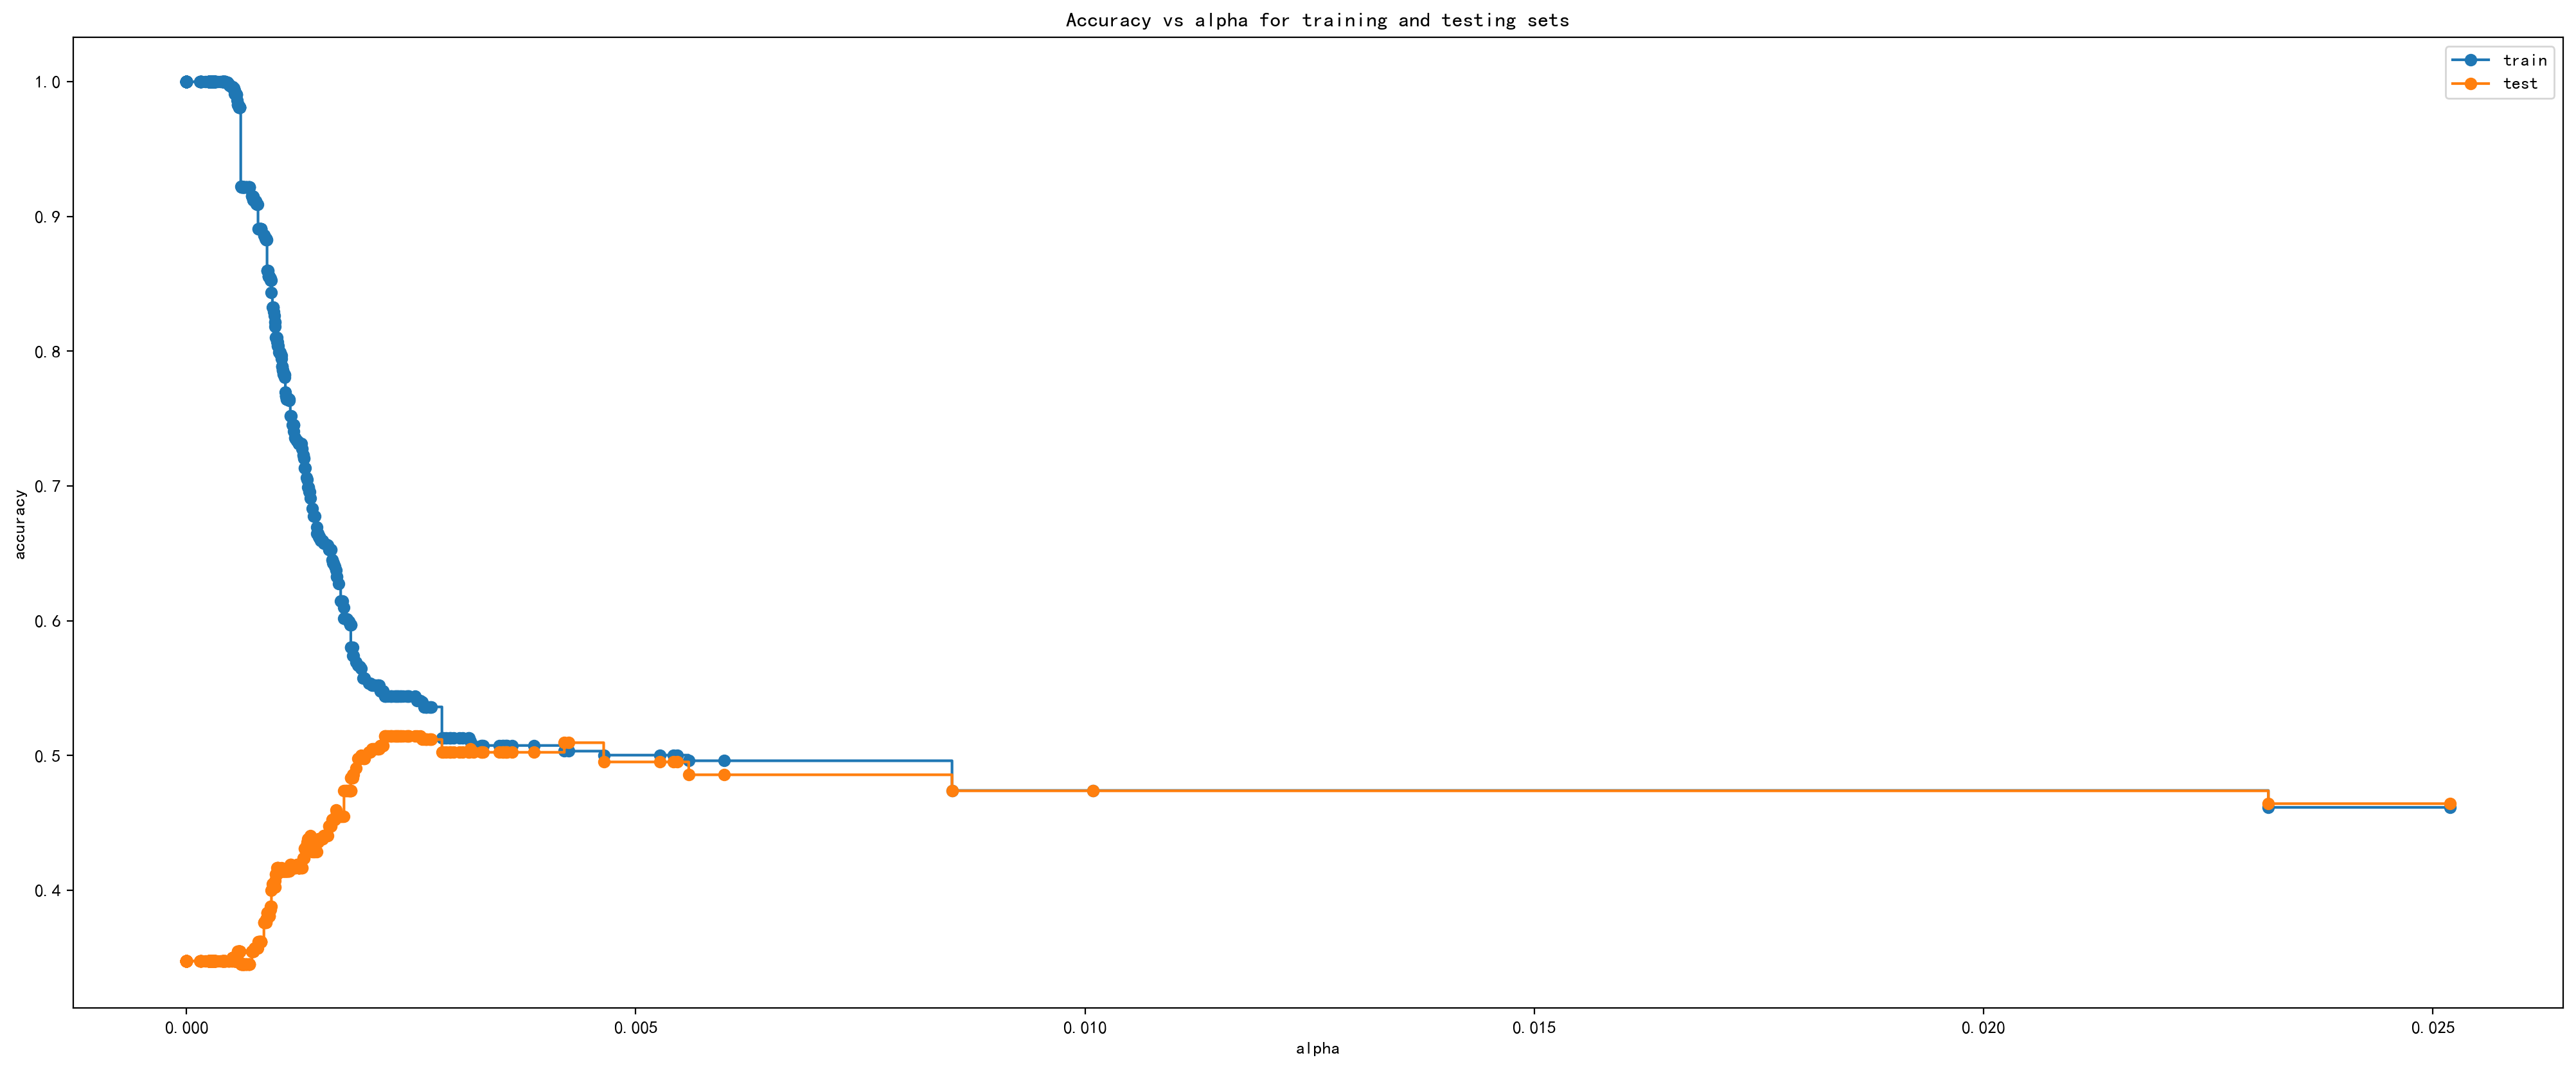

In [267]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib as plt
from sklearn.metrics import accuracy_score
from sklearn import tree

path = clf.cost_complexity_pruning_path(Xtrain, Ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
# print(ccp_alphas)


clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=119, ccp_alpha=ccp_alpha)
    clf.fit(Xtrain, Ytrain)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

#返回：Number of nodes in the last tree is: 1 with ccp_alpha: 0.3184482456829032

#绘制不同ccp_alpha取值下，clf在训练样本和测试样本上的精确度
train_scores = [clf.score(Xtrain, Ytrain) for clf in clfs]
test_scores = [clf.score(Xtest, Ytest) for clf in clfs]
from matplotlib import pyplot
plt.rcParams['savefig.dpi'] = 80 #图片像素
plt.rcParams['figure.dpi'] = 200 #分辨率
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600*400
fig, ax = pyplot.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
pyplot.show()

0.4595238095238095


[Text(1937.5, 1359.0, 'X[9] <= 1.5\ngini = 0.734\nsamples = 1677\nvalue = [102, 192, 47, 88, 93, 223, 151, 781]'),
 Text(968.75, 1057.0, 'X[1] <= 42.5\ngini = 0.806\nsamples = 855\nvalue = [91, 69, 31, 27, 80, 160, 108, 289]'),
 Text(484.375, 755.0, 'gini = 0.841\nsamples = 499\nvalue = [77, 55, 24, 16, 55, 66, 78, 128]'),
 Text(1453.125, 755.0, 'gini = 0.709\nsamples = 356\nvalue = [14, 14, 7, 11, 25, 94, 30, 161]'),
 Text(2906.25, 1057.0, 'X[3] <= 3.5\ngini = 0.604\nsamples = 822\nvalue = [11, 123, 16, 61, 13, 63, 43, 492]'),
 Text(2421.875, 755.0, 'X[11] <= 4.5\ngini = 0.581\nsamples = 273\nvalue = [4, 90, 2, 4, 1, 16, 5, 151]'),
 Text(1937.5, 453.0, 'X[4] <= 4.5\ngini = 0.537\nsamples = 236\nvalue = [3, 60, 2, 3, 1, 15, 4, 148]'),
 Text(1453.125, 151.0, 'gini = 0.336\nsamples = 109\nvalue = [1, 2, 1, 3, 0, 11, 3, 88]'),
 Text(2421.875, 151.0, 'gini = 0.567\nsamples = 127\nvalue = [2, 58, 1, 0, 1, 4, 1, 60]'),
 Text(2906.25, 453.0, 'gini = 0.333\nsamples = 37\nvalue = [1, 30, 0, 1, 

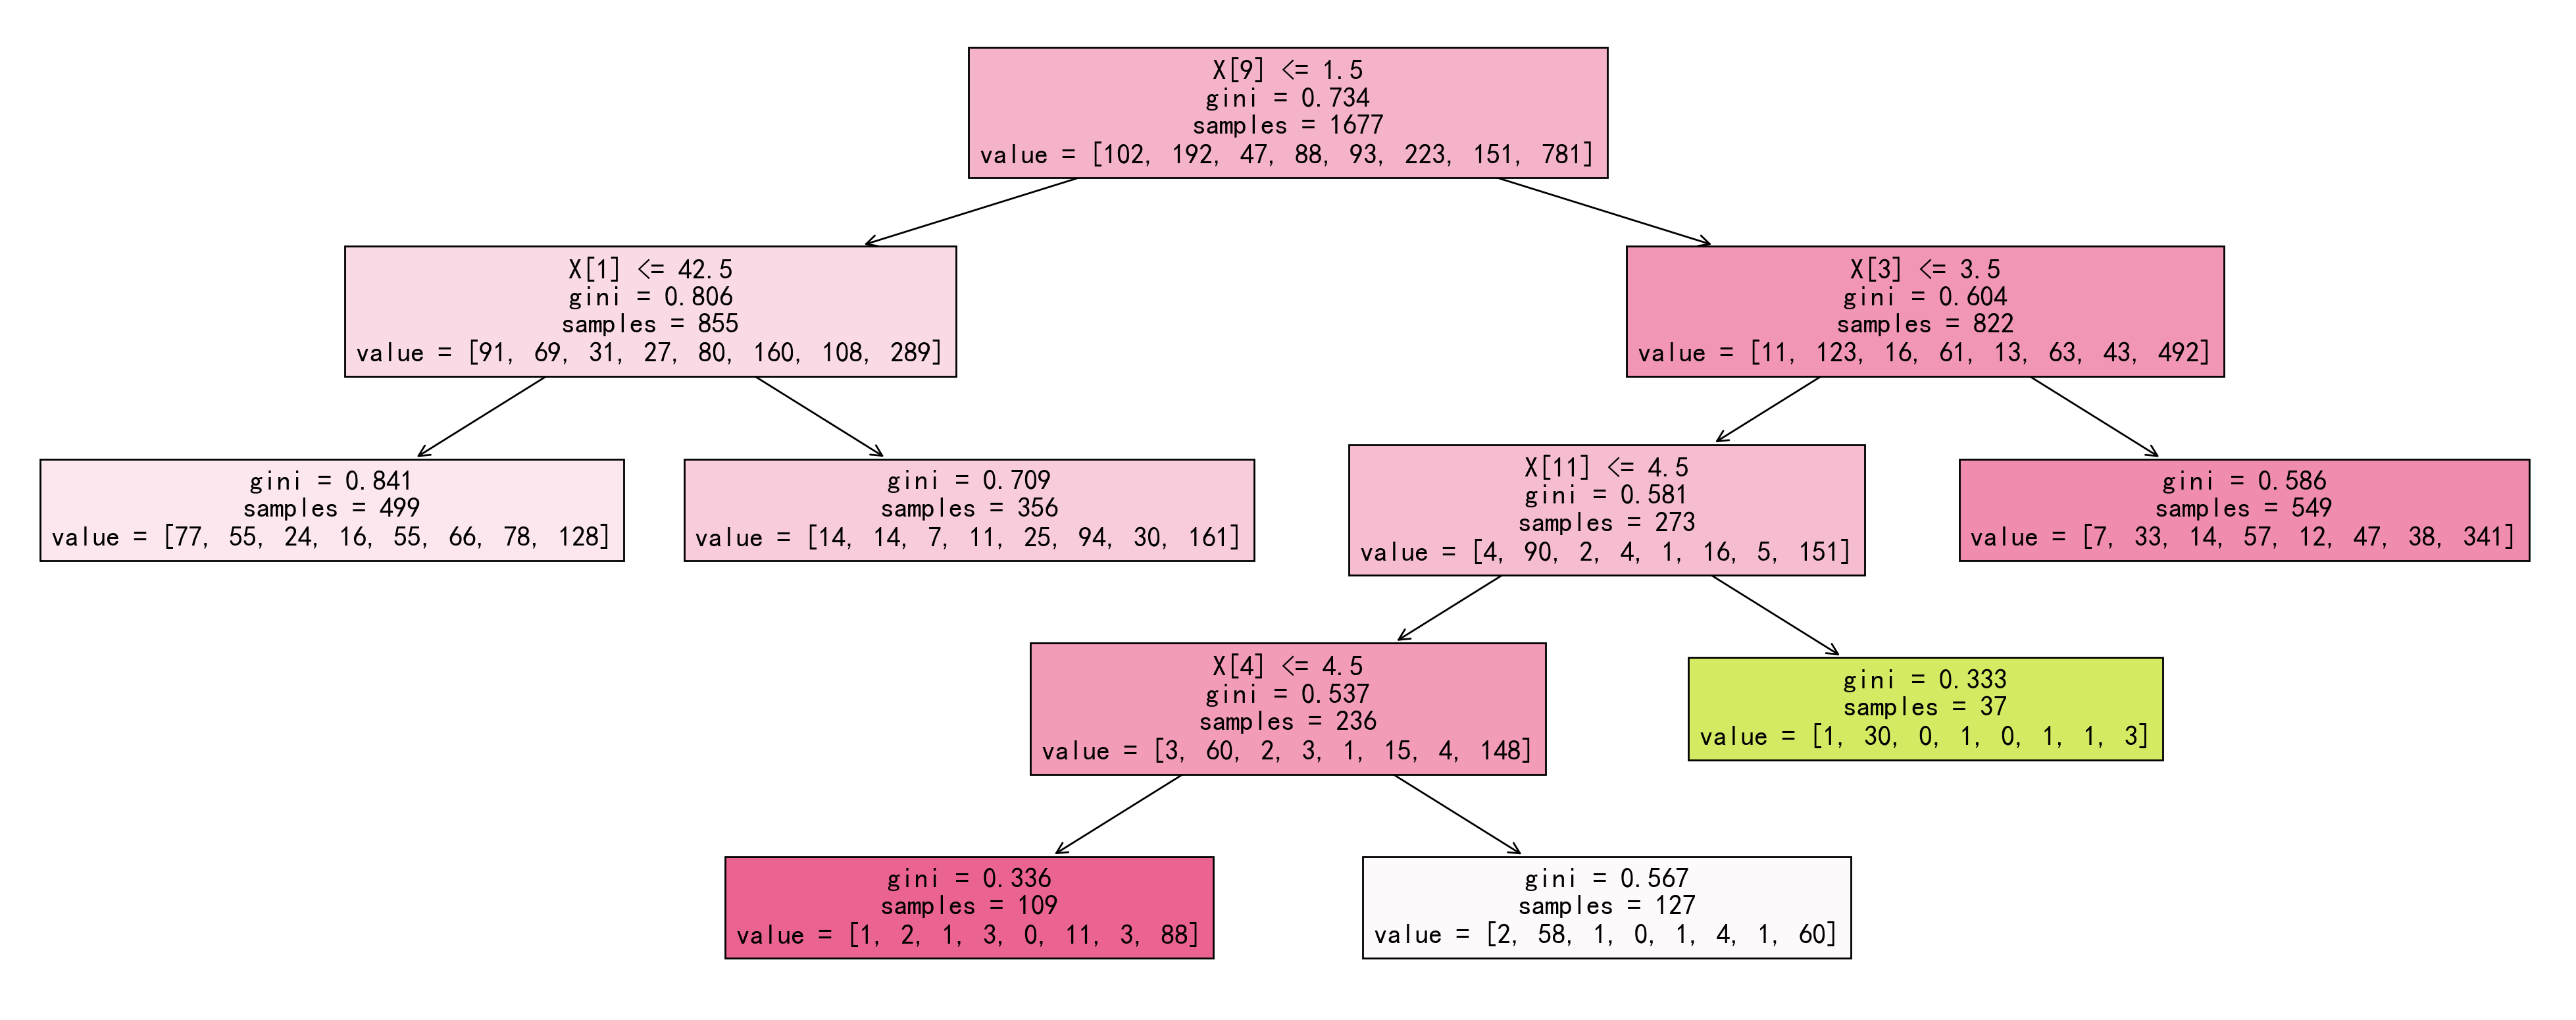

In [240]:
clf2 = DecisionTreeClassifier(random_state=119, ccp_alpha=0.009)
clf2.fit(Xtrain,Ytrain)
pred2=clf2.predict(Xtest)
print(accuracy_score(Ytest, pred2))
#结果：0.916083916083916

#绘制剪枝后的决策树
tree.plot_tree(clf2,filled=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib as plt
from sklearn.metrics import accuracy_score
from sklearn import tree